In [61]:
from copy import deepcopy
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [62]:
data = pd.read_csv('data/titanic.csv')

# Data preprocessing

In [63]:
data.head(n=10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [64]:
data.shape

(887, 8)

check for missing values

In [65]:
print(data.isna().sum())
print()
print(data.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


remove the `name` column since it is useless to us

In [66]:
data = data.drop('Name', axis=1)

encode the `sex` column

In [67]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [68]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
#data['Sex'].replace(['male', 'female'], ['0', '1'], inplace=True)

In [69]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


check class imbalance

<AxesSubplot: xlabel='Survived', ylabel='Count'>

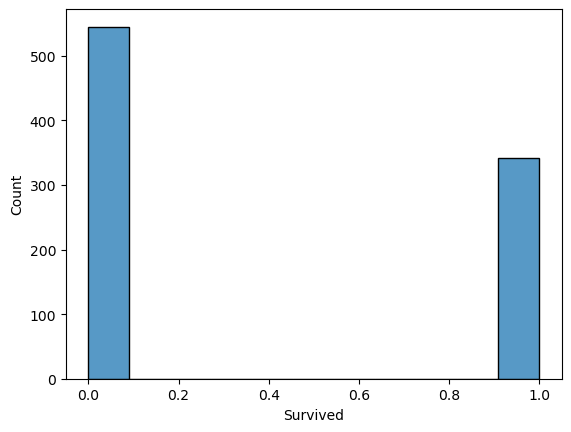

In [70]:
sns.histplot(data, x=data['Survived'])

In [71]:
print(f"Survived %: {(data[data['Survived'] == 1].shape[0] / data.shape[0]) * 100}")
print(f"Deceased %: {(data[data['Survived'] == 0].shape[0] / data.shape[0]) * 100}")

Survived %: 38.55693348365276
Deceased %: 61.44306651634723


<AxesSubplot: xlabel='Sex', ylabel='Count'>

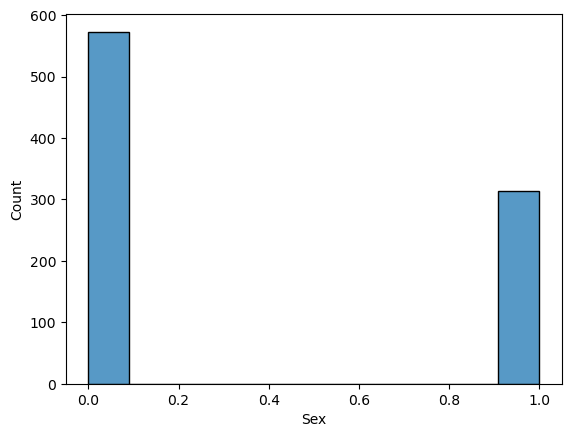

In [72]:
sns.histplot(data, x=data['Sex'])

In [73]:
print(f"Males %: {(data[data['Sex'] == 0].shape[0] / data.shape[0]) * 100}")
print(f"Females %: {(data[data['Sex'] == 1].shape[0] / data.shape[0]) * 100}")

Males %: 64.59977452085683
Females %: 35.400225479143174


## Data normalization

In [74]:
data.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.354002,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


In [75]:
standard_scale = StandardScaler()

### Age

In [76]:
fig = px.histogram(data, x="Age")
fig.show()

In [77]:
data = data[data['Age'] < 74]

In [78]:
fig = px.histogram(data, x="Age")
fig.show()

#### Mean/Std

In [79]:
data['Age'] = standard_scale.fit_transform(data[['Age']])

In [80]:
# data_age_mean = data['Age'].mean(axis=0)
# data_age_std = data['Age'].std(axis=0)
# data['Age'] = (data['Age']-data_age_mean)/data_age_std

In [81]:
fig = px.histogram(data, x="Age")
fig.show()

### Fare

In [82]:
fig = px.histogram(data, x="Fare")
fig.show()

In [83]:
data = data[data['Fare'] < 500]

In [84]:
fig = px.histogram(data, x="Fare")
fig.show()

#### Log scalling

In [85]:
data['Fare'] = data['Fare'].apply(lambda x: np.log(x+1))

In [86]:
fig = px.histogram(data, x="Fare")
fig.show()

In [87]:
data['Fare'] = standard_scale.fit_transform(data[['Fare']])

In [88]:
# data_fare_mean = data['Fare'].mean(axis=0)
# data_fare_std = data['Fare'].std(axis=0)
# data['Fare'] = (data['Fare']-data_fare_mean)/data_fare_std

In [89]:
fig = px.histogram(data, x="Fare")
fig.show()

### Standard scalling everything >:D

In [90]:
# data['Sex'] = standard_scale.fit_transform(data[['Sex']])
# data['Pclass'] = standard_scale.fit_transform(data[['Pclass']])
# data['Parents/Children Aboard'] = standard_scale.fit_transform(data[['Parents/Children Aboard']])
# data['Siblings/Spouses Aboard'] = standard_scale.fit_transform(data[['Siblings/Spouses Aboard']])

## Split dataset

In [91]:
data.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,8.820000e+02
mean,0.383220,2.310658,0.354875,-0.001456,0.528345,0.384354,-3.021015e-16
std,0.486447,0.834065,0.478747,1.001953,1.107088,0.809075,1.000567e+00
min,0.000000,1.000000,0.000000,-2.075298,0.000000,0.000000,-3.100566e+00
25%,0.000000,2.000000,0.000000,-0.671405,0.000000,0.000000,-8.033369e-01
50%,0.000000,3.000000,0.000000,-0.097802,0.000000,0.000000,-2.271297e-01
75%,1.000000,3.000000,1.000000,0.619202,1.000000,0.000000,5.367622e-01
max,1.000000,3.000000,1.000000,2.985315,8.000000,6.000000,2.751454e+00


In [92]:
data.dtypes

Survived                     int64
Pclass                       int64
Sex                          int64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [93]:
from sklearn.model_selection import train_test_split

70% 30%

In [94]:
y = data['Survived']
x = data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]

In [95]:
print(y.shape)
print(x.shape)

(882,)
(882, 6)


In [96]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=420)

In [97]:
print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

617 617
265 265


In [98]:
# x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, train_size=0.5, random_state=420)

In [99]:
# print(len(x_val), len(y_val))
# print(len(x_test), len(y_test))

In [100]:
x_train.to_csv('data/train/data.csv', index=False)
y_train.to_csv('data/train/labels.csv', index=False)

x_val.to_csv('data/val/data.csv', index=False)
y_val.to_csv('data/val/labels.csv', index=False)

# x_test.to_csv('data/test/data.csv', index=False)
# y_test.to_csv('data/test/labels.csv', index=False)

<AxesSubplot: xlabel='Survived', ylabel='Count'>

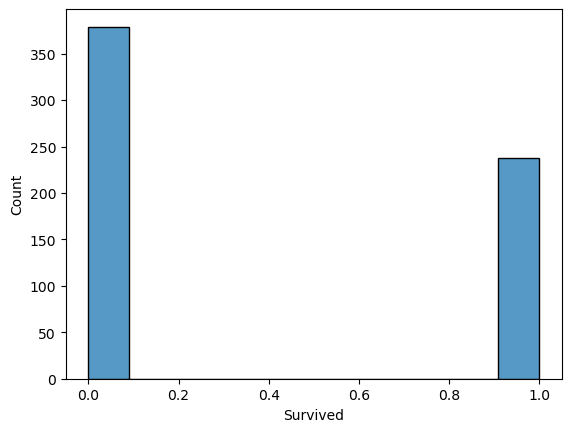

In [101]:
sns.histplot(data, x=y_train)

<AxesSubplot: xlabel='Survived', ylabel='Count'>

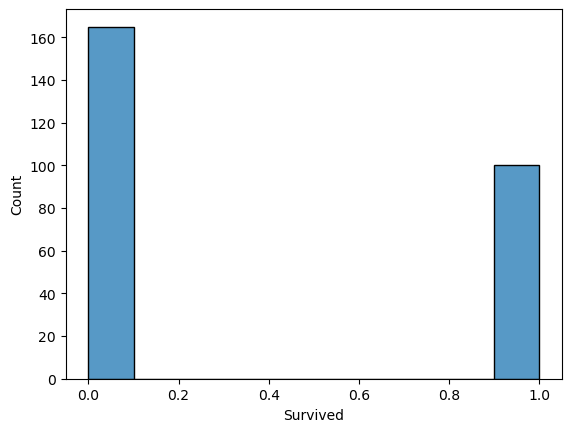

In [102]:
sns.histplot(data, x=y_val)

In [103]:
# sns.histplot(data, x=y_test)

# Playground

In [104]:
print(data['Parents/Children Aboard'].sort_values().unique())
print(data['Siblings/Spouses Aboard'].sort_values().unique())

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 8]


In [105]:
data[data['Siblings/Spouses Aboard'] == 8]

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
158,0,3,0,-1.746911,8,2,1.366491
179,0,3,1,-1.531809,8,2,1.366491
200,0,3,0,-0.886506,8,2,1.366491
322,0,3,0,-0.671405,8,2,1.366491
788,0,3,1,-0.599704,8,2,1.366491
842,0,3,0,-0.814806,8,2,1.366491
859,0,3,1,-1.101607,8,2,1.366491


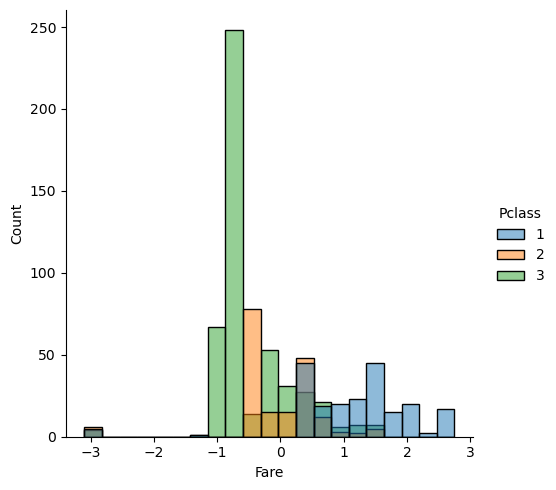

In [106]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

#### Skalovanie hodnot stlpca 'Fare' do rozsahu (0, 1)

In [107]:
data['Fare'].describe()

count    8.820000e+02
mean    -3.021015e-16
std      1.000567e+00
min     -3.100566e+00
25%     -8.033369e-01
50%     -2.271297e-01
75%      5.367622e-01
max      2.751454e+00
Name: Fare, dtype: float64

<AxesSubplot: xlabel='Fare', ylabel='Density'>

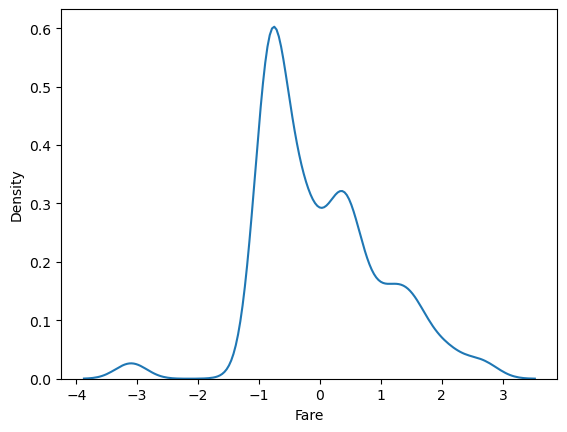

In [108]:
sns.kdeplot(data['Fare'])

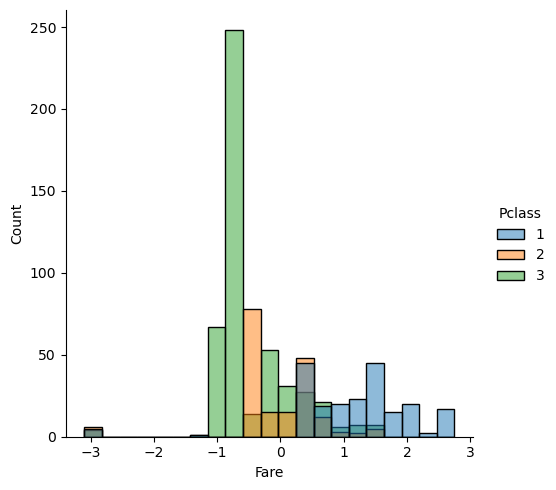

In [109]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

In [110]:
data['Fare'].sort_values().tail(10)

697    2.600006
554    2.600006
297    2.688040
117    2.688040
738    2.748966
309    2.748966
339    2.751454
87     2.751454
27     2.751454
435    2.751454
Name: Fare, dtype: float64

In [111]:
data = data[data['Fare'] < 500]

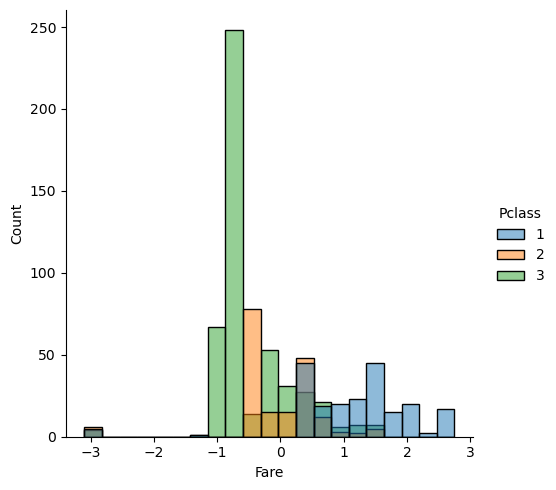

In [112]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

In [113]:
scaler = MinMaxScaler()
data['Fare'] = scaler.fit_transform(data['Fare'].values.reshape(-1,1))

In [114]:
data['Fare'].describe()

count    882.000000
mean       0.529828
std        0.170978
min        0.000000
25%        0.392553
50%        0.491016
75%        0.621551
max        1.000000
Name: Fare, dtype: float64

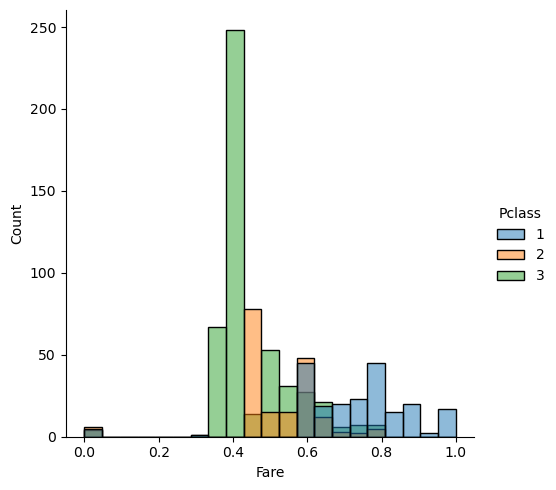

In [115]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

#### Normalizacia stlpca 'Fare' pomocou mean a variance 

In [116]:
fare_mean = data['Fare'].mean()
fare_variance = data['Fare'].var()

print(f"mean: {fare_mean}")
print(f"variance: {fare_variance}")

mean: 0.5298282975284467
variance: 0.02923352117947708


In [117]:
data['Fare'] = data['Fare'] - fare_mean
data['Fare'] = data['Fare'] / fare_variance

In [118]:
fare_mean = data['Fare'].mean()
fare_variance = data['Fare'].var()

print(f"mean: {fare_mean}")
print(f"variance: {fare_variance}")

mean: -1.627320097772565e-15
variance: 34.20730584798761


<AxesSubplot: xlabel='Fare', ylabel='Density'>

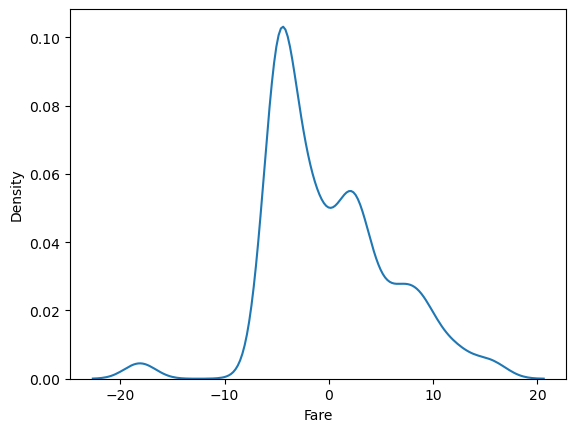

In [119]:
sns.kdeplot(data['Fare'])

## Zobrazenie dat po ukonceni predspracovania

In [120]:
data.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,-0.528004,1,0,-5.178273
1,1,1,1,0.619202,1,0,8.136564
2,1,3,1,-0.241203,0,0,-4.695813
3,1,1,1,0.404101,1,0,6.358952
4,0,3,0,0.404101,0,0,-4.610488
5,0,3,0,-0.169502,0,0,-4.339772
6,0,1,0,1.766408,0,0,6.216993
7,0,3,0,-1.962012,3,1,0.859792
8,1,3,1,-0.169502,0,2,-2.811834
9,1,2,1,-1.101607,1,0,2.956805
